In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [6]:
# other
import missingno as msno
import os

In [7]:
data=pd.read_csv("housing.csv")

In [8]:
df_housing=data.copy()

In [9]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
# Check info
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
## Some statistics on data 
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
## check nulls of data 
df_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
##Comment: It seems that Dataset is a contains 20640 instances and only 207 null values in total bedrooms feature, and also all datatypes is float64 as they are continuous numerical features except the (ocean_proximity) column which is nominal categorical Feature

In [14]:
#Removing the null values
df_housing.dropna(inplace=True)

In [15]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [19]:
#We will now split the data into 2 sets->One dataset will be used to train the model and another dataset will be used to test the model
from sklearn.model_selection import train_test_split

X=df_housing.drop(['median_house_value'],axis=1)
Y=df_housing['median_house_value']

In [20]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [21]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [22]:
#Splitting the data into training set and test set. test_size->denotes what percentage of data are we going to use as test set.
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [23]:
#combining the training data
train_data=X_train.join(Y_train)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 8679 to 4800
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   ocean_proximity     16346 non-null  object 
 9   median_house_value  16346 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [27]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8679,-118.33,33.88,30.0,1856.0,444.0,899.0,435.0,3.1505,<1H OCEAN,270000.0
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,<1H OCEAN,253900.0
12175,-117.23,33.77,5.0,2108.0,496.0,1666.0,461.0,2.0000,INLAND,83000.0
6875,-118.11,34.07,39.0,1270.0,299.0,1073.0,278.0,3.3088,<1H OCEAN,186600.0
2790,-118.40,37.36,34.0,2465.0,619.0,1172.0,575.0,1.9722,INLAND,116100.0
...,...,...,...,...,...,...,...,...,...,...
19889,-119.16,36.31,7.0,2946.0,664.0,1608.0,622.0,1.6829,INLAND,80200.0
11118,-117.87,33.84,17.0,2395.0,410.0,1224.0,399.0,5.1182,<1H OCEAN,249200.0
9131,-118.02,34.57,4.0,10655.0,1706.0,5391.0,1529.0,5.0830,INLAND,151300.0
8333,-118.31,33.93,37.0,1282.0,244.0,852.0,249.0,4.2917,<1H OCEAN,127900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

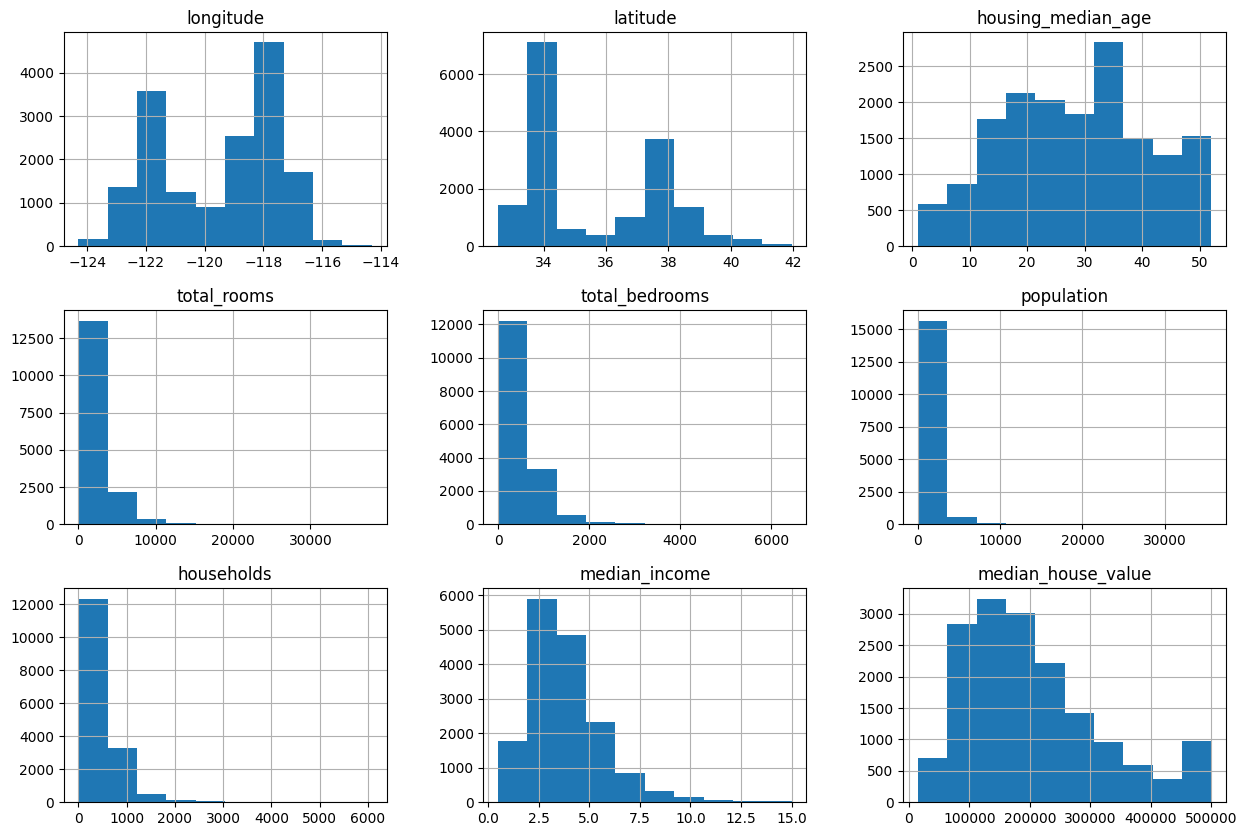

In [30]:
train_data.hist(figsize=(15,10))

In [35]:
train_data=train_data.drop(['ocean_proximity'],axis=1)
#sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [36]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8679,-118.33,33.88,30.0,1856.0,444.0,899.0,435.0,3.1505,270000.0
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0
12175,-117.23,33.77,5.0,2108.0,496.0,1666.0,461.0,2.0000,83000.0
6875,-118.11,34.07,39.0,1270.0,299.0,1073.0,278.0,3.3088,186600.0
2790,-118.40,37.36,34.0,2465.0,619.0,1172.0,575.0,1.9722,116100.0
...,...,...,...,...,...,...,...,...,...
19889,-119.16,36.31,7.0,2946.0,664.0,1608.0,622.0,1.6829,80200.0
11118,-117.87,33.84,17.0,2395.0,410.0,1224.0,399.0,5.1182,249200.0
9131,-118.02,34.57,4.0,10655.0,1706.0,5391.0,1529.0,5.0830,151300.0
8333,-118.31,33.93,37.0,1282.0,244.0,852.0,249.0,4.2917,127900.0


<Axes: >

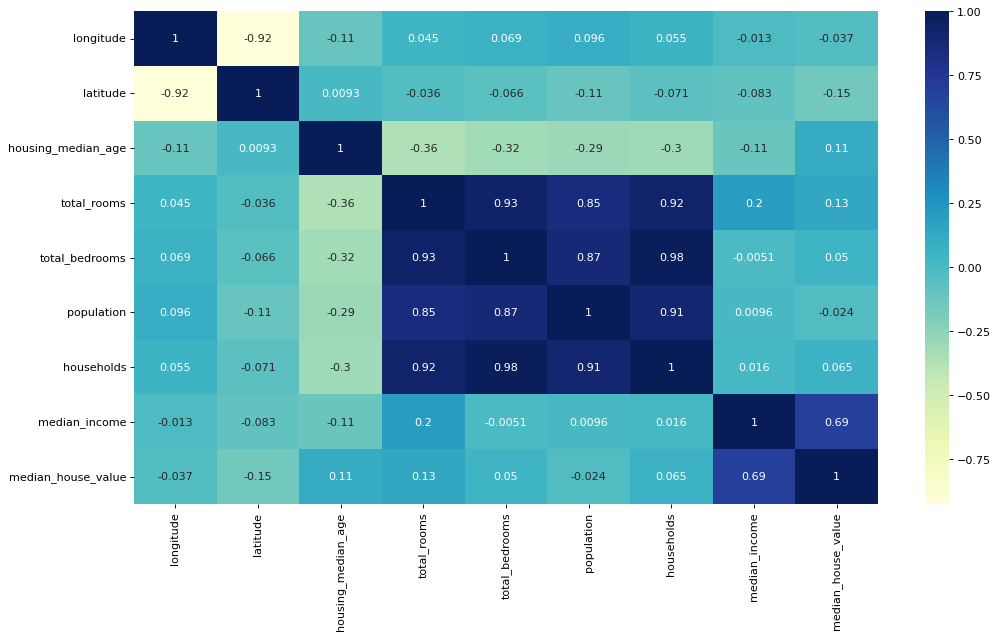

In [43]:
from matplotlib.pyplot import figure
figure(figsize=(15,8),dpi=80)
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")